## 데이터 셋의 펜 종류, 펜 색상 확인

In [14]:
import os, json
import pandas as pd
import seaborn as sns

pandas를 통해서 현재 파일들의 정보를 저장

In [3]:
df = pd.DataFrame([], columns=['pen_type', 'pen_color', 'age', 'sex'])

In [5]:
label_path = '/home/smobile/Desktop/PENAI_DATA/Paper_Label/'
pen_type_desc = ['ball', 'marker', 'stylus', 'etc']
sex_desc = ['female', 'male', 'etc']

for idx, json_name in enumerate(os.listdir(label_path)) :
	with open(label_path + json_name, 'r', encoding='utf8') as f :
		label = json.load(f)
	
	pen_type = pen_type_desc[int(label["Images"]["pen_type"])]
	pen_color = label["Images"]["pen_color"]
	age = label["Images"]["writer_age"]
	sex = sex_desc[int(label["Images"]["writer_sex"])]

	df.loc[idx] = [pen_type, pen_color, age, sex]

In [6]:
df.sample(5)

,pen_type,pen_color,age,sex
15982,marker,red,27,female
12066,ball,black,19,male
221,marker,red,40,male
3142,marker,red,41,female
23897,marker,blue,36,female


seaborn을 통해서 데이터의 수 시각화하기

<Axes: xlabel='pen_type', ylabel='count'>

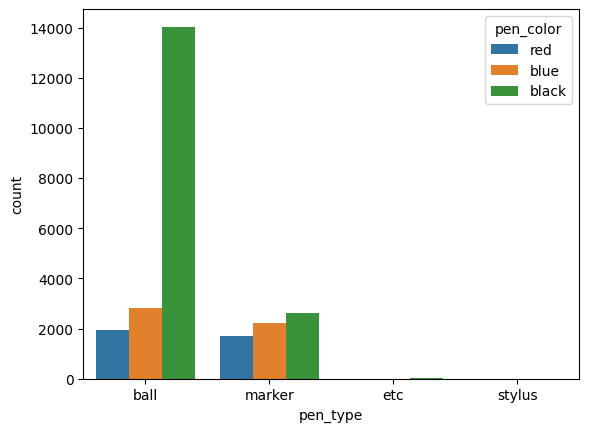

In [7]:
sns.countplot(df, x='pen_type', hue='pen_color')

In [13]:
df[(df['pen_color'] == 'black') & (df['pen_type'] == 'ball')].describe()

,age
count,14032.000000
mean,26.890892
std,13.425234
min,0.000000
25%,19.000000
50%,25.000000
75%,32.000000
max,59.000000


* pen color = `black`, pen type = `ball point pen`

-> 14,000

<Axes: xlabel='sex', ylabel='count'>

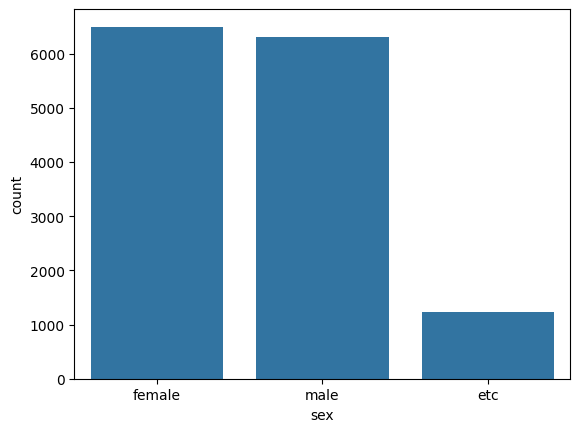

In [17]:
sns.countplot(df[(df['pen_color'] == 'black') & (df['pen_type'] == 'ball')], x='sex')

## divide data set
* **`train`**
    * male : female = 2500 : 2500
    * (total - 5000)
    
* **`valid`** 
    * male : female = 250 : 250
    * (total - 500)

* **`test`** 
    * male : femele = 250 : 250
    * (total - 500)

# 성별 label 분류

In [22]:
label_path = './sample_label/'
sub_path = [label_path + 'female/', label_path + 'male/']

orig = [file for file in os.listdir(label_path) if file.count('.') == 1]

for json_name in orig :
	with open(label_path + json_name, 'r', encoding='utf8') as f :
		label = json.load(f)
		sex_data = int(label["Images"]["writer_sex"])
	
	if sex_data == 0 :
		os.rename(label_path+json_name, sub_path[0]+json_name)
	elif sex_data == 1 :
		os.rename(label_path+json_name, sub_path[1]+json_name)